In [1]:
import pandas as pd
import os

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from scipy import stats
import xport

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVR, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)
from pandas.plotting import scatter_matrix

from sklearn.metrics import average_precision_score

Using TensorFlow backend.


# Import Data

In [2]:
# function:  rename_chosen_features(xpt_file,old_names,new_names,csv_file)
# purpose:   rename the chosen features in the XPT file
# input:     xpt_file: the converted dataframe from XPT file
#            old_names: a list of strings - strings are code names on NHANES 
#            new_names: a list of strings 
#            csv_file: name 
# output:    a dataframe with renamed chosen features  

def rename_chosen_features(xpt_file,old_names,new_names,csv_file):
    df = xpt_file[old_names]        
    df.columns = new_names                
    # xpt_file.to_csv(csv_file, header=False) # if needs to get a csv file from the original xpt file
    return df

Features: 
    Demographic: Gender, Marital Status, Annual Household Income, Education Level, BMI, 


In [3]:
# datasets storage direction
os.chdir('C:/Users/yiyic/Alchohol Research/datasets/')
# RIAGENDR: gender - codes
# DMDMARTL: marital status - code
# INDHHIN2 : annual household income - values & codes: 
# DMDHREDU : education level 
# INQ132: Cash Assitance from country/state
#2007-2008
## Demographics
DEMO_xpt_file_1 = pd.read_sas('DEMO_0708.XPT')
DEMO_csv_file_1 = 'Demographic0708.csv'
DEMO_old_names_1 = ['SEQN','RIAGENDR','DMDHRMAR','INDHHIN2','DMDHREDU']
DEMO_new_names_1 = ['ID','gender','marital_status','household_income','education_level']
df1_Demo = rename_chosen_features(DEMO_xpt_file_1,DEMO_old_names_1,DEMO_new_names_1,DEMO_csv_file_1)
## Body Measures
BMX_xpt_file_1 = pd.read_sas('BMX_0708.XPT')
BMX_cvs_file_1 = 'BMI0708.csv'
# BMXBMI: Body Mass Index (kg/m**2) - values: 11.5 to 67.3
BMX_old_names_1 = ['SEQN','BMXBMI']  
BMX_new_names_1 = ['ID','BMI']
df1_BMX = rename_chosen_features(BMX_xpt_file_1,BMX_old_names_1,BMX_new_names_1,BMX_cvs_file_1)


#2009-2010
DEMO_xpt_file_2 = pd.read_sas('DEMO_0910.XPT')
DEMO_cvs_file_2 = 'Demographic0910.csv'
DEMO_old_names_2 = ['SEQN','RIAGENDR','DMDHRMAR','INDHHIN2','DMDHREDU']
DEMO_new_names_2 = ['ID','gender','marital_status','household_income','education_level']
df2_Demo= rename_chosen_features(DEMO_xpt_file_2,DEMO_old_names_2,DEMO_new_names_2,DEMO_cvs_file_2)
## Body Measures
BMX_xpt_file_2 = pd.read_sas('BMX_0910.XPT')
BMX_cvs_file_2 = 'BMI0910.csv'
# BMXBMI: Body Mass Index (kg/m**2) - values: 11.5 to 67.3
BMX_old_names_2 = ['SEQN','BMXBMI']  
BMX_new_names_2 = ['ID','BMI']
df2_BMX = rename_chosen_features(BMX_xpt_file_2,BMX_old_names_2,BMX_new_names_2,BMX_cvs_file_2)


#2011-2012
## Demographics
DEMO_xpt_file_3 = pd.read_sas('DEMO_1112.XPT')
DEMO_cvs_file_3 = 'Demographic1112.csv'
DEMO_old_names_3 = ['SEQN','RIAGENDR','DMDHRMAR','INDHHIN2','DMDHREDU']
DEMO_new_names_3 = ['ID','gender','marital_status','household_income','education_level']
df3_Demo = rename_chosen_features(DEMO_xpt_file_3,DEMO_old_names_3,DEMO_new_names_3,DEMO_cvs_file_3)
## Body Measures
BMX_xpt_file_3 = pd.read_sas('BMX_1112.XPT')
BMX_cvs_file_3 = 'BMI1112.csv'
# BMXBMI: Body Mass Index (kg/m**2) - values: 11.5 to 67.3
BMX_old_names_3 = ['SEQN','BMXBMI']  
BMX_new_names_3 = ['ID','BMI']
df3_BMX = rename_chosen_features(BMX_xpt_file_3,BMX_old_names_3,BMX_new_names_3,BMX_cvs_file_3)

#2013-2014
## Demographics
DEMO_xpt_file_4 = pd.read_sas('DEMO_1314.XPT')
DEMO_cvs_file_4 = 'Demographic1314.csv'
DEMO_old_names_4 = ['SEQN','RIAGENDR','DMDHRMAR','INDHHIN2','DMDHREDU']
DEMO_new_names_4 = ['ID','gender','marital_status','household_income','education_level']
df4_Demo = rename_chosen_features(DEMO_xpt_file_4,DEMO_old_names_4,DEMO_new_names_4,DEMO_cvs_file_4)
## Body Measures
BMX_xpt_file_4 = pd.read_sas('BMX_1314.XPT')
BMX_cvs_file_4 = 'BMI1314.csv'
# BMXBMI: Body Mass Index (kg/m**2) - values: 11.5 to 67.3
BMX_old_names_4 = ['SEQN','BMXBMI']  
BMX_new_names_4 = ['ID','BMI']
df4_BMX = rename_chosen_features(BMX_xpt_file_4,BMX_old_names_4,BMX_new_names_4,BMX_cvs_file_4)

#2015-2016
## Demographics
DEMO_xpt_file_5 = pd.read_sas('DEMO_1516.XPT')
DEMO_cvs_file_5 = 'Demographic1516.csv'
DEMO_old_names_5 = ['SEQN','RIAGENDR','DMDHRMAR','INDHHIN2','DMDHREDU']
DEMO_new_names_5 = ['ID','gender','marital_status','household_income','education_level']
df5_Demo = rename_chosen_features(DEMO_xpt_file_5,DEMO_old_names_5,DEMO_new_names_5,DEMO_cvs_file_5)
## Body Measures
BMX_xpt_file_5 = pd.read_sas('BMX_1516.XPT')
BMX_cvs_file_5 = 'BMI1516.csv'
# BMXBMI: Body Mass Index (kg/m**2) - values: 11.5 to 67.3
BMX_old_names_5 = ['SEQN','BMXBMI']  
BMX_new_names_5 = ['ID','BMI']
df5_BMX = rename_chosen_features(BMX_xpt_file_5,BMX_old_names_5,BMX_new_names_5,BMX_cvs_file_5)

In [4]:
#alchohol consumption
#2007-2008
ALQ_xpt_file_1=pd.read_sas('ALQ_0708.XPT')
ALQ_csv_file_1='ALQ0708.csv'
#ALQ101: Had at least 12 alcohol drinks/1 yr?
ALQ_old_names_1=['SEQN','ALQ101']
ALQ_new_names_1=['ID','alchohol']
df1_ALQ=rename_chosen_features(ALQ_xpt_file_1,ALQ_old_names_1,ALQ_new_names_1,ALQ_csv_file_1)
#2009-2010
ALQ_xpt_file_2=pd.read_sas('ALQ_0910.XPT')
ALQ_csv_file_2='ALQ0910.csv'
#ALQ101: Had at least 12 alcohol drinks/1 yr?
ALQ_old_names_2=['SEQN','ALQ101']
ALQ_new_names_2=['ID','alchohol']
df2_ALQ=rename_chosen_features(ALQ_xpt_file_2,ALQ_old_names_2,ALQ_new_names_2,ALQ_csv_file_2)
#2011-2012
ALQ_xpt_file_3=pd.read_sas('ALQ_1112.XPT')
ALQ_csv_file_3='ALQ1112.csv'
#ALQ101: Had at least 12 alcohol drinks/1 yr?
ALQ_old_names_3=['SEQN','ALQ101']
ALQ_new_names_3=['ID','alchohol']
df3_ALQ=rename_chosen_features(ALQ_xpt_file_3,ALQ_old_names_3,ALQ_new_names_3,ALQ_csv_file_3)

#2013-2014
ALQ_xpt_file_4=pd.read_sas('ALQ_1314.XPT')
ALQ_csv_file_4='ALQ1314.csv'
#ALQ101: Had at least 12 alcohol drinks/1 yr?
ALQ_old_names_4=['SEQN','ALQ101']
ALQ_new_names_4=['ID','alchohol']
df4_ALQ=rename_chosen_features(ALQ_xpt_file_4,ALQ_old_names_4,ALQ_new_names_4,ALQ_csv_file_4)

#2015-2016
ALQ_xpt_file_5=pd.read_sas('ALQ_1516.XPT')
ALQ_csv_file_5='ALQ1516.csv'
#ALQ101: Had at least 12 alcohol drinks/1 yr?
ALQ_old_names_5=['SEQN','ALQ101']
ALQ_new_names_5=['ID','alchohol']
df5_ALQ=rename_chosen_features(ALQ_xpt_file_5,ALQ_old_names_5,ALQ_new_names_5,ALQ_csv_file_5)




# Merge Dataframes

In [5]:
df1 = pd.merge(df1_Demo, df1_BMX, how ="inner", on = "ID")
df1 = pd.merge(df1,df1_ALQ, how ="inner", on = "ID")

df2 = pd.merge(df2_Demo, df2_BMX, how ="inner", on = "ID")
df2 = pd.merge(df2,df2_ALQ, how ="inner", on = "ID")

df3 = pd.merge(df3_Demo, df3_BMX, how ="inner", on = "ID")
df3 = pd.merge(df3,df3_ALQ, how ="inner", on = "ID")

df4 = pd.merge(df4_Demo, df4_BMX, how ="inner", on = "ID")
df4 = pd.merge(df4,df4_ALQ, how ="inner", on = "ID")

df5 = pd.merge(df5_Demo, df5_BMX, how ="inner", on = "ID")
df5 = pd.merge(df5,df5_ALQ, how ="inner", on = "ID")



# Set Index

In [6]:
# set SEQN to index of the df1
df1.set_index('ID', inplace=True)      
# if has duplicated indexs(ID), keep the first one 
df1 = df1[~df1.index.duplicated(keep='first')]


# set SEQN to index of the df2
df2.set_index('ID', inplace=True)      
# if has duplicated indexs(ID), keep the first one 
df2 = df2[~df2.index.duplicated(keep='first')]

# set SEQN to index of the df3
df3.set_index('ID', inplace=True)      
# if has duplicated indexs(ID), keep the first one 
df3 = df3[~df3.index.duplicated(keep='first')]


# set SEQN to index of the df4
df4.set_index('ID', inplace=True)      
# if has duplicated indexs(ID), keep the first one 
df4 = df4[~df4.index.duplicated(keep='first')]

# set SEQN to index of the df5
df5.set_index('ID', inplace=True)      
# if has duplicated indexs(ID), keep the first one 
df5 = df5[~df5.index.duplicated(keep='first')]

In [7]:
df1 = df1.reindex(sorted(df1.columns), axis=1)
df2 = df2.reindex(sorted(df1.columns), axis=1)
df3 = df3.reindex(sorted(df1.columns), axis=1)
df4 = df4.reindex(sorted(df1.columns), axis=1)
df5 = df5.reindex(sorted(df1.columns), axis=1)

final_df = pd.concat([df1, df2,df3,df4,df5], axis =0)
final_df.info()

df = final_df.copy(deep=True)
df.head()
print(df)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29040 entries, 41475.0 to 93702.0
Data columns (total 6 columns):
BMI                 28635 non-null float64
alchohol            26171 non-null float64
education_level     28186 non-null float64
gender              29040 non-null float64
household_income    28647 non-null float64
marital_status      28697 non-null float64
dtypes: float64(6)
memory usage: 1.6 MB
           BMI  alchohol  education_level  gender  household_income  \
ID                                                                    
41475.0  58.04       2.0              4.0     2.0               6.0   
41477.0  30.05       2.0              3.0     1.0               5.0   
41479.0  27.56       1.0              1.0     1.0               8.0   
41481.0  23.34       1.0              4.0     1.0               6.0   
41482.0  33.64       1.0              4.0     1.0              15.0   
...        ...       ...              ...     ...               ...   
93695.0  21.50  

# Data Pre-Processing¶

In [8]:
# function:  clean_epsilon(cell)
# purpose:   in the orginal files, zeros are represented by a small value (10^-79), convert them to actual zeros
# input:     a dataframe that with (10^-79) as zeroes 
# output:    a dataframe with actual zeroes 

def clean_epsilon(cell):
    if cell - 0.0 < 0.0001:
        return 0
    return cell

df = df.applymap(clean_epsilon)

In [9]:
# function:  get_cstr_ratio(df,feature,cstr)
# purpose:   get the percentage of 'don't know' and 'refuse' out of number of entries
# input:     cstr: a list of two integers. ex: [77,99] 
# output:    ratios of dk/entries and refuse/entries 

def get_cstr_ratio(df,feature,cstr):
    total_count = df.shape[0]
    dk = cstr[0]      # don't know
    refuse = cstr[1]  # refuse to answer
    
    feature_counts = df[feature].value_counts().to_dict()
    if dk not in feature_counts: dk = 0         # When there's no 'dk'/'refuse' in responses
    else: dk = feature_counts[dk]
    if refuse not in feature_counts: refuse = 0
    else: refuse = feature_counts[refuse]

    dk = int(dk)
    refuse = int(refuse)
    r1 = dk/total_count
    r2 = refuse/total_count
    print()
    print('The ratio of [dont know] is', r1)
    print('The ratio of [refuse] is', r2)
    print('Now call: process_cstr(df,feature,cstr,method)')

# function:  process_cstr(df,feature,cstr,method)
# purpose:   if cstr ratio is high, then replace cstr with NaN and deal with NaN later
#            if cstr ratio is low, then drop entries with cstr
# input:     cstr: a list of two integers. ex: [77,99]
#            method: select among 'drop', 'NaN'
# output:    

def process_cstr(df,feature,cstr,method):
    dk = cstr[0] # don't know
    refuse = cstr[1]  # refuse to answer
    if method == 'drop':
        df = df[df[feature] != dk]
        df = df[df[feature] != refuse]
    elif method == 'NaN':
        df[feature][df[feature] == dk] = np.nan
        df[feature][df[feature] == refuse] = np.nan
    else:
        print('The method you choose is not included yet, add new method now!')
    return df

In [10]:
#Function to obtain the count of missing values
def get_value_count(df,feature): 
    print()
    print('NaN   ',df[feature].isna().sum())
    print(df[feature].value_counts())

# Functions to Visualize Missing values¶

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29040 entries, 41475.0 to 93702.0
Data columns (total 6 columns):
BMI                 28635 non-null float64
alchohol            26171 non-null float64
education_level     28186 non-null float64
gender              29040 non-null float64
household_income    28647 non-null float64
marital_status      28697 non-null float64
dtypes: float64(6)
memory usage: 1.6 MB


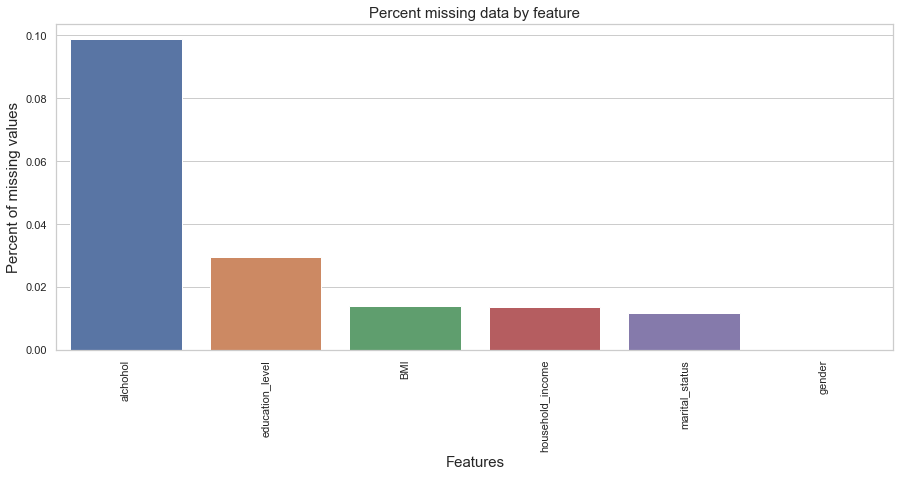

In [11]:
def get_NaN_ratio(df,feature):
    print()
    total_count = df.shape[0]                  # total entries
    feature_valid_count = df[feature].count()  # non-NaN entries for chosen feature
    feature_null_count = total_count - feature_valid_count
    NaN_ratio = feature_null_count/total_count
    print('The NaN ratio in',feature,'is',"%.3f" % NaN_ratio)
    if NaN_ratio == 0:
        print('No missing values detected')
    elif NaN_ratio <= 0.1:
        print('Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category')
        print('Now call function: fill_NaN(df, feature, fill_type)')
    else:
        print('Since NaN ratio is large, predict NaN using ML or check predictability first...')
        print('if check predictability, call: check_predictability_all/some_x(df,y,method)')
        print('if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)')

# features = df.columns.values.tolist()
# for feature in features:
#     get_NaN_ratio(df,feature)
#     print('----------------------')


def plot_NaN_percentage_for_all(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    # missing_data.head()
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    
    
plot_NaN_percentage_for_all(df)
df.info()

# Outliers

In [12]:
def find_anomalies(data, a):
    anomalies_a = []
    patient_a = []

    # Set upper and lower limit to 3 standard deviation 
    random_data_std = data.std()
    random_data_mean = data.mean()
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for i in data:
        if i > upper_limit or i < lower_limit:
            anomalies_a.append(i)
            index_value_i = (data==i).index
            patient_a.append(index_value_i)
    return anomalies_a
    #return patient_a

print(df.columns)

Index(['BMI', 'alchohol', 'education_level', 'gender', 'household_income',
       'marital_status'],
      dtype='object')


363


count    28272.000000
mean        28.665251
std          6.240853
min         13.180000
25%         24.100000
50%         27.800000
75%         32.210000
max         49.840000
Name: BMI, dtype: float64

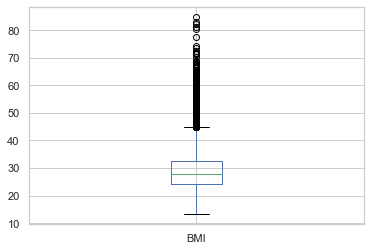

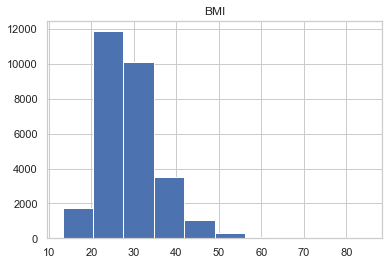

In [13]:
print(len(find_anomalies(df["BMI"],1)))
boxplot = df.boxplot(column=['BMI'])
hist = df.hist(column=['BMI'])
for i in find_anomalies(df["BMI"],1):
    df = df[df.BMI != i]
df["BMI"].describe()

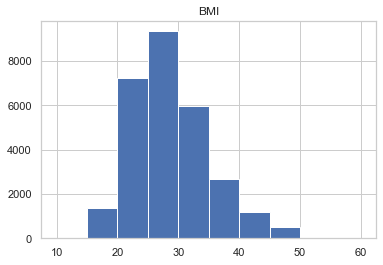

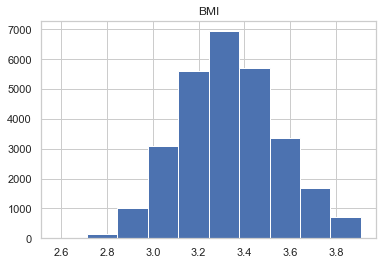

In [14]:
hist_before = df.hist(column=['BMI'], range=[10, 60])
df["BMI"] = np.log(df["BMI"])
hist_after = df.hist(column=['BMI'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000188CF05EFC8>]],
      dtype=object)

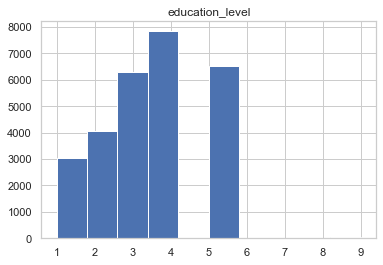

In [15]:
df.hist(column=['education_level'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000188CF6F8208>]],
      dtype=object)

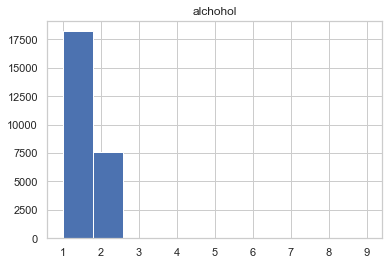

In [16]:
df.hist(column=['alchohol'])

# Drop don't know and refuse to answer in features

In [17]:
df=process_cstr(df,'marital_status',method='drop',cstr=[77,99])

In [18]:
df=process_cstr(df,'household_income',method='drop',cstr=[77,99])

In [19]:
df=process_cstr(df,'education_level',method='drop',cstr=[7,9])

In [20]:
df=process_cstr(df,'alchohol',method='drop',cstr=[7,9])

# from the plot of missing values, the percentage is relatively small. We can just delete the missing values.


In [21]:
df.dropna(axis=0,how='any',inplace=True)

In [22]:
df

,BMI,alchohol,education_level,gender,household_income,marital_status
ID,,,,,,
41477.0,3.402863,2.0,3.0,1.0,5.0,1.0
41479.0,3.316365,1.0,1.0,1.0,8.0,1.0
41481.0,3.150169,1.0,4.0,1.0,6.0,3.0
41482.0,3.515716,1.0,4.0,1.0,15.0,5.0
41483.0,3.785552,2.0,4.0,1.0,5.0,1.0
...,...,...,...,...,...,...
93691.0,3.044522,2.0,1.0,1.0,10.0,1.0
93695.0,3.068053,2.0,3.0,2.0,4.0,2.0
93696.0,3.520461,2.0,5.0,1.0,9.0,1.0


In [24]:
#Change 2(NHANES for Female) to 0(False - boolean) for features with YES/NO answers
df.loc[df['gender'] == 2,['gender']] = 0
df['gender'].value_counts()

0.0    11790
1.0    11630
Name: gender, dtype: int64

In [25]:
df

,BMI,alchohol,education_level,gender,household_income,marital_status
ID,,,,,,
41477.0,3.402863,2.0,3.0,1.0,5.0,1.0
41479.0,3.316365,1.0,1.0,1.0,8.0,1.0
41481.0,3.150169,1.0,4.0,1.0,6.0,3.0
41482.0,3.515716,1.0,4.0,1.0,15.0,5.0
41483.0,3.785552,2.0,4.0,1.0,5.0,1.0
...,...,...,...,...,...,...
93691.0,3.044522,2.0,1.0,1.0,10.0,1.0
93695.0,3.068053,2.0,3.0,0.0,4.0,2.0
93696.0,3.520461,2.0,5.0,1.0,9.0,1.0


In [26]:
#change maried people and people living with partner to 1, Otherwise 0: single.
df["marital_status"].replace({6: 1,2:0,3:0,4:0,5:0},inplace=True) 

In [27]:
#according to the stat us,a household income <$45000: low income.change low income to 0, higher than that to 1
df['household_income'].replace({1: 0,2:0,3:0,4:0,5:0,6:0,7:0,8:1,9:1,10:1,11:1,12:1,13:1,14:1,15:1},inplace=True) 

In [28]:
#change education lower than high school graduates to 0
df["education_level"].replace({1: 0,2:0,3:1,4:1,5:1},inplace=True) 

In [29]:
df.head()

,BMI,alchohol,education_level,gender,household_income,marital_status
ID,,,,,,
41477.0,3.402863,2.0,1.0,1.0,0.0,1.0
41479.0,3.316365,1.0,0.0,1.0,1.0,1.0
41481.0,3.150169,1.0,1.0,1.0,0.0,0.0
41482.0,3.515716,1.0,1.0,1.0,1.0,0.0
41483.0,3.785552,2.0,1.0,1.0,0.0,1.0


# Alchohol Consumption

In [30]:
# Change 2(NHANES for No) to 0(False - boolean) for features with YES/NO answers
df.loc[df['alchohol'] == 2,['alchohol']] = 0
df['alchohol'].value_counts()

1.0    16703
0.0     6717
Name: alchohol, dtype: int64

In [31]:
df['alchohol']

ID
41477.0    0.0
41479.0    1.0
41481.0    1.0
41482.0    1.0
41483.0    0.0
          ... 
93691.0    0.0
93695.0    0.0
93696.0    0.0
93697.0    1.0
93702.0    1.0
Name: alchohol, Length: 23420, dtype: float64

In [32]:
df.head()

,BMI,alchohol,education_level,gender,household_income,marital_status
ID,,,,,,
41477.0,3.402863,0.0,1.0,1.0,0.0,1.0
41479.0,3.316365,1.0,0.0,1.0,1.0,1.0
41481.0,3.150169,1.0,1.0,1.0,0.0,0.0
41482.0,3.515716,1.0,1.0,1.0,1.0,0.0
41483.0,3.785552,0.0,1.0,1.0,0.0,1.0


# Correlation between variables

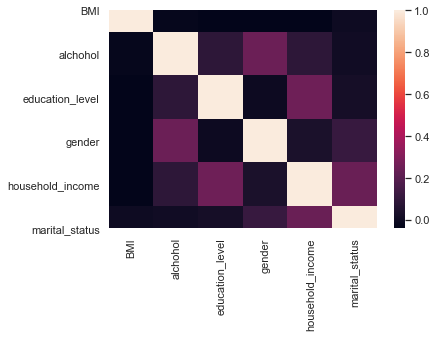

In [33]:
corr=df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [43]:
y = df['alchohol'].values
X = df.drop(['alchohol'],axis = 1).values
X_names = df.drop(['alchohol'],axis = 1).columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [44]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred = logisticRegr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [47]:
#confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 122 1261]
 [  80 3221]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.60      0.09      0.15      1383
         1.0       0.72      0.98      0.83      3301

    accuracy                           0.71      4684
   macro avg       0.66      0.53      0.49      4684
weighted avg       0.68      0.71      0.63      4684



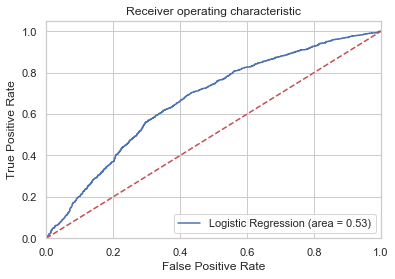

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()